# Part 3: Logistic Regression

In this part, we will be working with the wine dataset. This dataset contains 11 chemical features of various wines, along with experts' rating of that wine's quality. The quality scale technically runs from 1-10, but only 3-9 are actually used in the data.

**Reference**
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

**Your goal is to fit a model able to classify a wine as good or bad quality.**

## The DataSet
The dataset contains the following features: 
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

The 12th column of the data file corresponds to the output variable, which represents the quality of the wine (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
wine_df = pd.read_csv('data/winequality-red.csv') #Reads a CSV file

## Exercise 1: Exploring the data

### Task 1.1: Using pandas for data exploration
As you did in linear regression, use the methods `head(params)` and `describe(params)` to explore the dataset.

In [3]:
#Your code here
wine_df.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [4]:
#Your code here
wine_df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Task 1.2: Adding a good/bad label
The current database does not have a field indicating if a wine is good or bad. We will use the label quality to categorize wines into good or bad according to the following rule: 
    - A wine is considered good if its quality is equal or above 6.5
    
Create a new field in the DataFrame, denoted good, that reflects this rule.  

In [5]:
wine_df['good'] = wine_df['quality']>=6.5 #Your code here

wine_df.good = wine_df.good.replace({True: 1, False: 0})
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Exercise 2: Data splits and further exploration
We will start first by splitting the data in two. For this exercise, we will only use a training and test set. We will omit the use of the validation set as we will train a single model and then check how well it generalizes.

In [6]:
wines_train, wines_test = train_test_split(wine_df, test_size=0.2, random_state=8, stratify=wine_df['good'])

X_train = wines_train.drop(['quality','good'], axis=1)
y_train = wines_train['good']

X_test = wines_test.drop(['quality','good'], axis=1)
y_test = wines_test['good']

X_train.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
209,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
632,7.6,0.41,0.14,3.0,0.087,21.0,43.0,0.99640,3.32,0.57,10.5
1182,10.2,0.40,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5
1310,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8
358,11.9,0.43,0.66,3.1,0.109,10.0,23.0,1.00000,3.15,0.85,10.4
159,6.8,0.60,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3
596,12.4,0.40,0.51,2.0,0.059,6.0,24.0,0.99940,3.04,0.60,9.3
207,7.8,0.57,0.31,1.8,0.069,26.0,120.0,0.99625,3.29,0.53,9.3
81,7.8,0.43,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4


### Question 2.1: train_test_split
Explain what is the role of each of the parameters used in the following line of code:

`train_test_split(wine_df, test_size=0.2, random_state=8, stratify=wine_df['good'])`

Your answer here: 

- wine_df is our input dataframe
- 
test_size is the size that we gave to split the data, here is 20
- 
random_state  anis integer number that contolls the shuffli before the split
- stratify is the class label we use in the splitlit

The function scatter_matrix from pandas allows to visually explore the data. This can be useful to identify potential correlations across the input features (which are undesirable). 

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='good', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volati

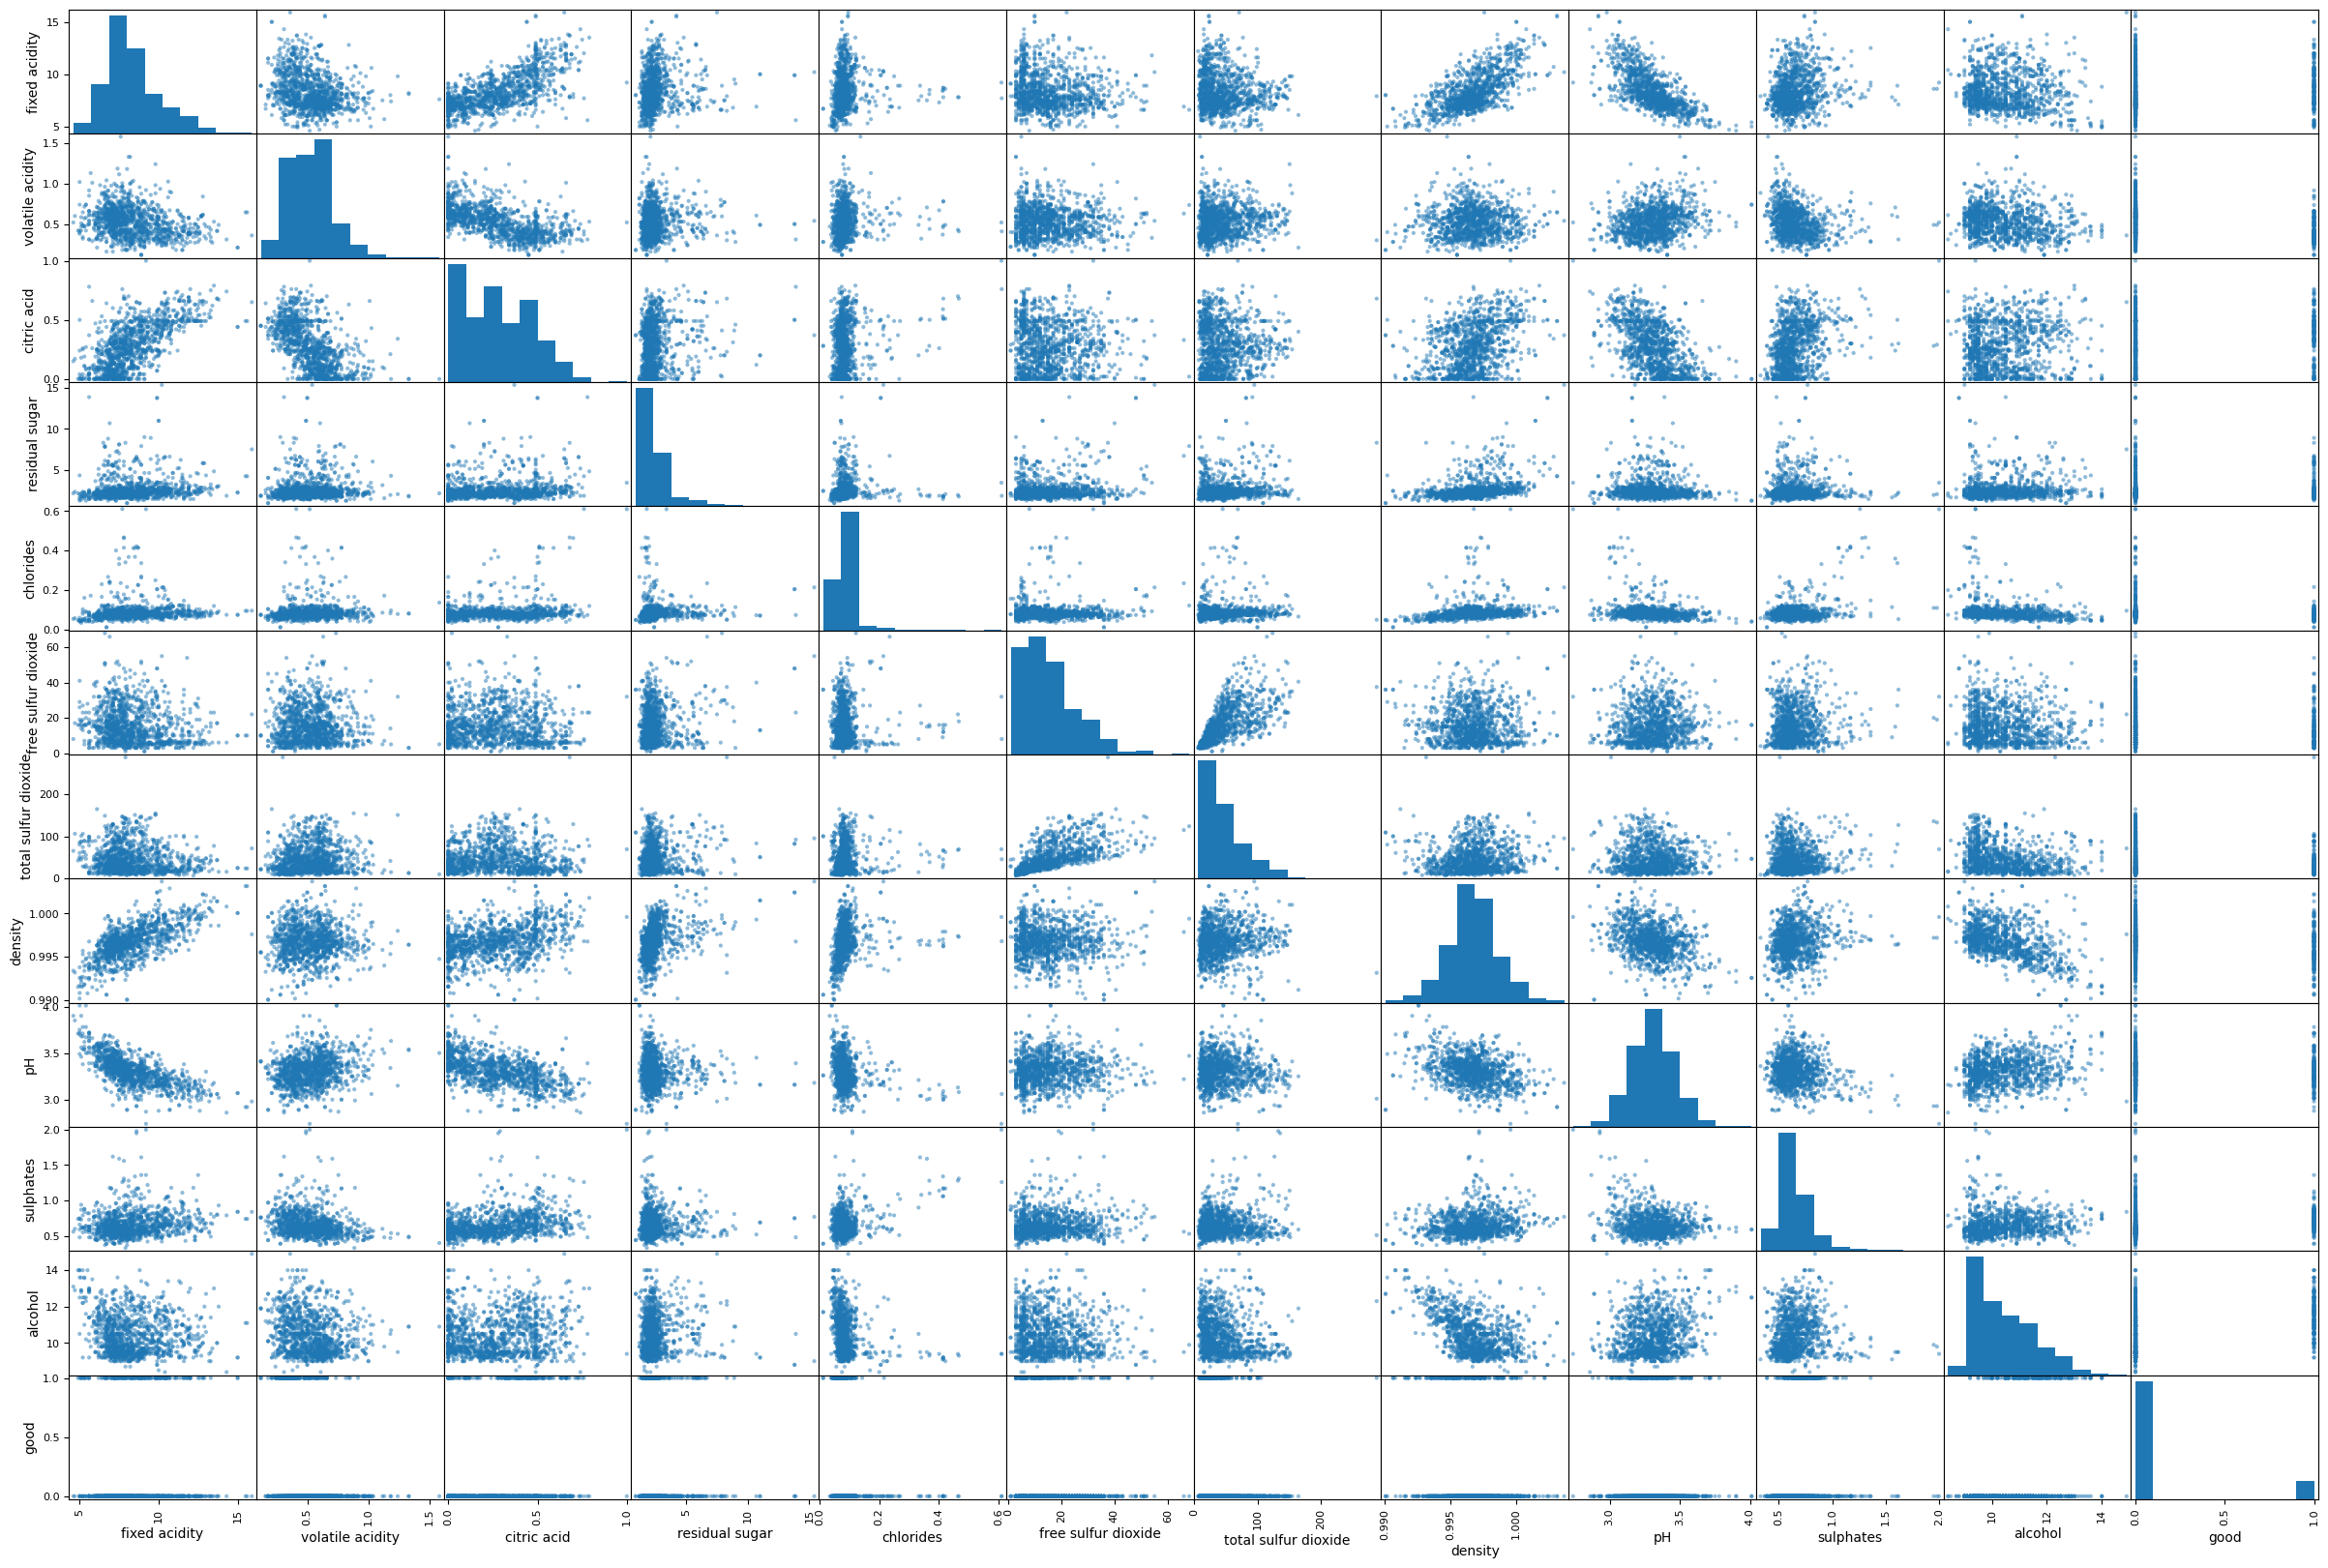

In [7]:
from pandas.plotting import scatter_matrix
wines_train = wines_train.drop(['quality'], axis=1)
scatter_matrix(wines_train, figsize=(30,20))

### Question 2.2: Scatter matrix Analysis
Based on the observed plots, do you consider there are any correlations among features? 

Your answer here: There are some features that show correlations among them for example fixed acidity and density, fixed_acidity and pH etc. There are also some weaker correlations between volatile acidity and citric acidity, and citric acidity and fixed acidity.

## Exercise 3: Training and Testing
We will  now proceed to train our logistic regression model.

In [8]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C=1000000, solver='newton-cg', max_iter=250).fit(X_train,y_train)
print(f'Logistic regression model coefficients:{logistic_model.coef_}\n')

Logistic regression model coefficients:[[ 2.34330651e-01 -2.96927332e+00  2.23238065e-02  2.70170655e-01
  -1.26498933e+01  1.47211425e-02 -1.99743670e-02 -1.98304865e+02
   3.37773222e-01  3.79650490e+00  7.33946537e-01]]



### Question set 3.1: Analysis of the coefficients
Based on the obtained coefficients:
1. Which features seem to have an important contribution towards considering a wine as good?
2. as bad?

Your answer here: 
1. The 'sulphates', 'pH'
2. The features 'density', 'chlorides'

In [9]:
print(f'Accuracy:{logistic_model.score(X_test,y_test)}\n')

Accuracy:0.89375



### Question 3.2: Accuracy and generalizability
What accuracy did you obtain? Do you consider it good or bad? 

Your answer here: accuracy = 0.89375, it is considered good because it is high enough

### Task 3.1 Comparison against a dummy model
Suppose now that you build a dummy model that classifies all wines as bad. 

In [10]:
y_pred = np.zeros(len(y_test))

Estimate this model's accuracy:

In [11]:
#Your code here
accuracy = logistic_model.score(X_test, y_pred)
#Your code ends here

print(f'Dummy model accuracy:{accuracy}\n')

Dummy model accuracy:0.921875



Given your results, has your original opinion about the trained model changed?

Your answer here: In this case we have a higher accuracy while the prediction is wrong so the model is not good, the original trained model is performing worse than a random guessing, it could be overfitted or class imbalance in the dataset